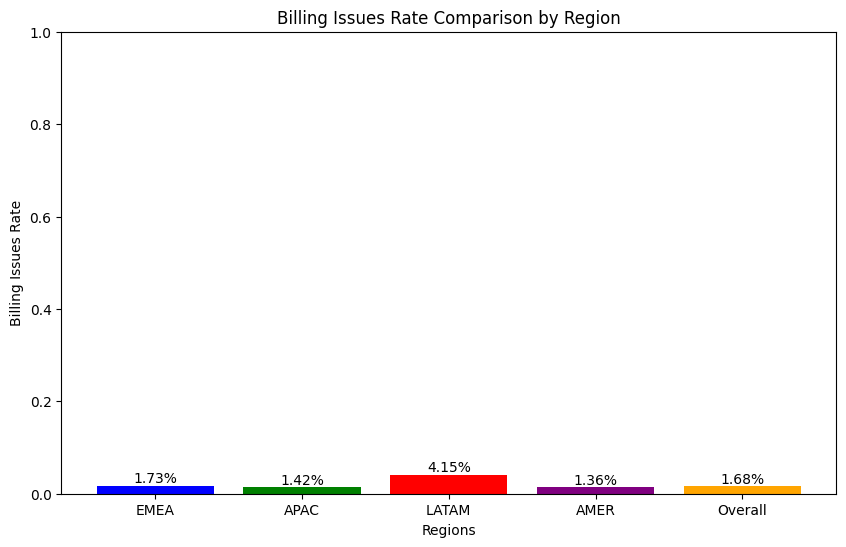

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('customer.csv')


billing_issues_rate_emea = df[df['region_emea'] == 1]['billing_dunning_not_ok'].mean()
billing_issues_rate_apac = df[df['region_apac'] == 1]['billing_dunning_not_ok'].mean()
billing_issues_rate_latam = df[df['region_latam'] == 1]['billing_dunning_not_ok'].mean()
billing_issues_rate_amer = df[df['region_amer'] == 1]['billing_dunning_not_ok'].mean()


overall_billing_issues_rate = df['billing_dunning_not_ok'].mean()


regions = ['EMEA', 'APAC', 'LATAM', 'AMER', 'Overall']
billing_issues_rates = [billing_issues_rate_emea, billing_issues_rate_apac, billing_issues_rate_latam, billing_issues_rate_amer, overall_billing_issues_rate]


plt.figure(figsize=(10, 6))
plt.bar(regions, billing_issues_rates, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Regions')
plt.ylabel('Billing Issues Rate')
plt.title('Billing Issues Rate Comparison by Region')
plt.ylim(0, 1) 
for i, rate in enumerate(billing_issues_rates):
    plt.text(i, rate, f'{rate:.2%}', ha='center', va='bottom')
plt.show()





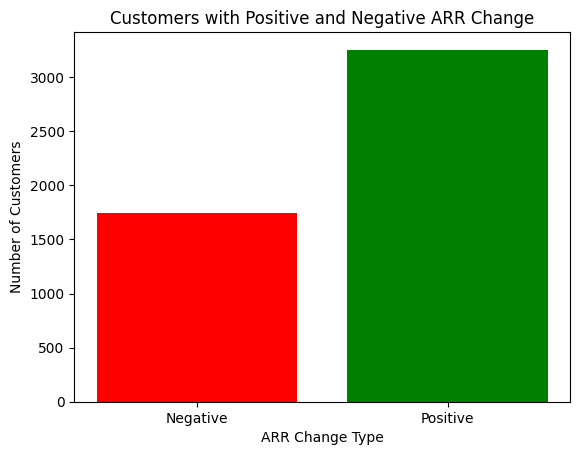

In [ ]:
import matplotlib.pyplot as plt
df=pd.read_csv("expansion_outcome_cleaned.csv")

negative_count = (df['arr_change'] < 0).sum()
positive_count = (df['arr_change'] > 0).sum()


plt.bar(['Negative', 'Positive'], [negative_count, positive_count], color=['red', 'green'])
plt.xlabel('ARR Change Type')
plt.ylabel('Number of Customers')
plt.title('Customers with Positive and Negative ARR Change')


plt.show()

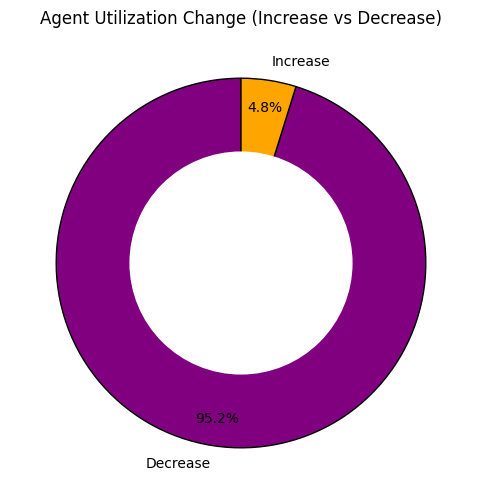

In [ ]:
import matplotlib.pyplot as plt
df=pd.read_csv("cleaned_utilization.csv")

decrease_count = (df['agent_utilization_increase'] == 0).sum()
increase_count = (df['agent_utilization_increase'] == 1).sum()


labels = ['Decrease', 'Increase']
sizes = [decrease_count, increase_count]
colors = ['purple', 'orange']


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90,
        wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(center_circle)


plt.title('Agent Utilization Change (Increase vs Decrease)')


plt.show()

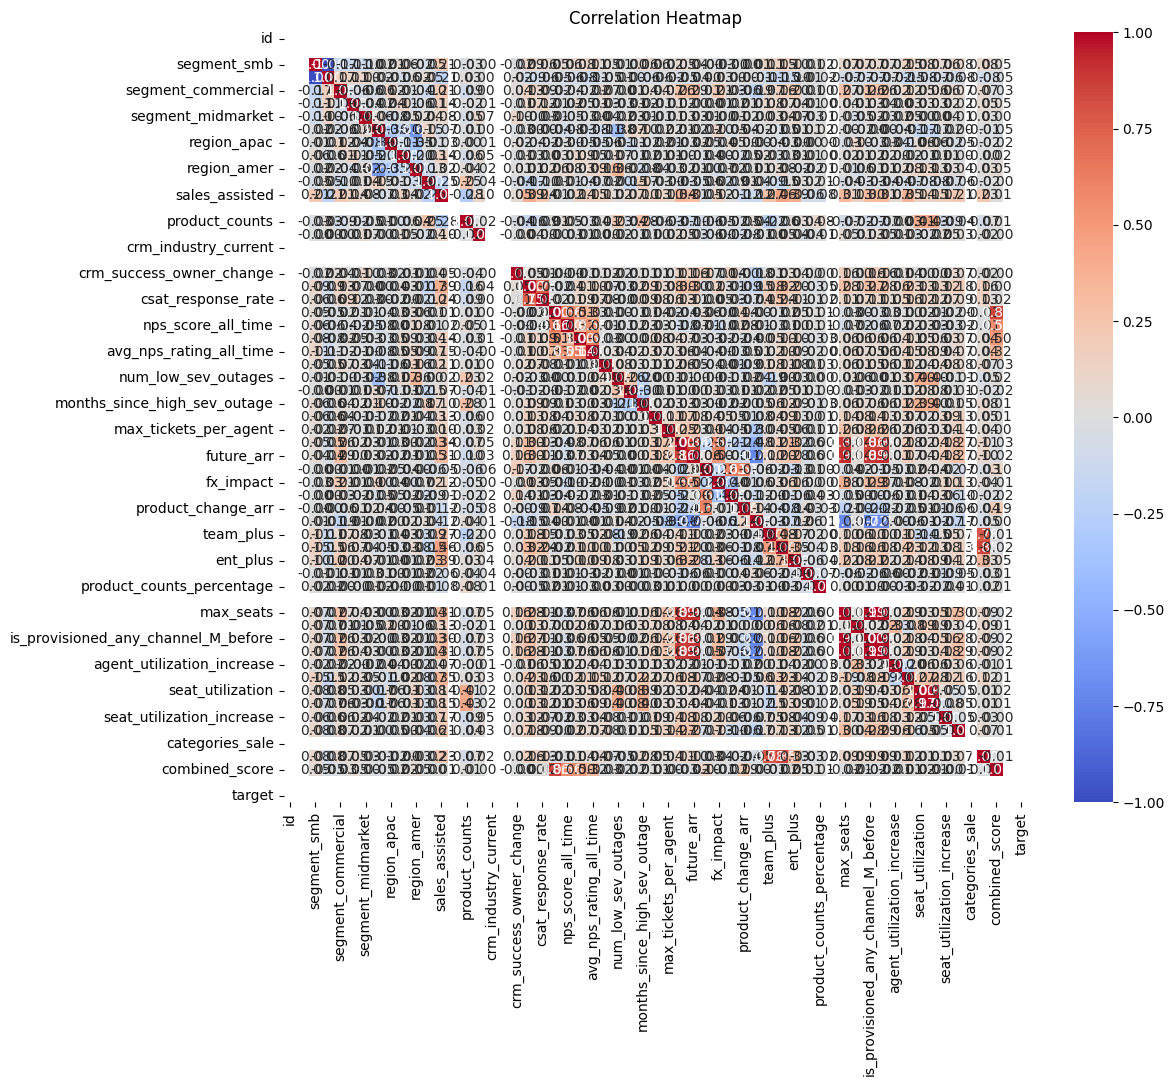

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("finalmerged_data.csv")  
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].map({'yes': 1, 'no': 0})


correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

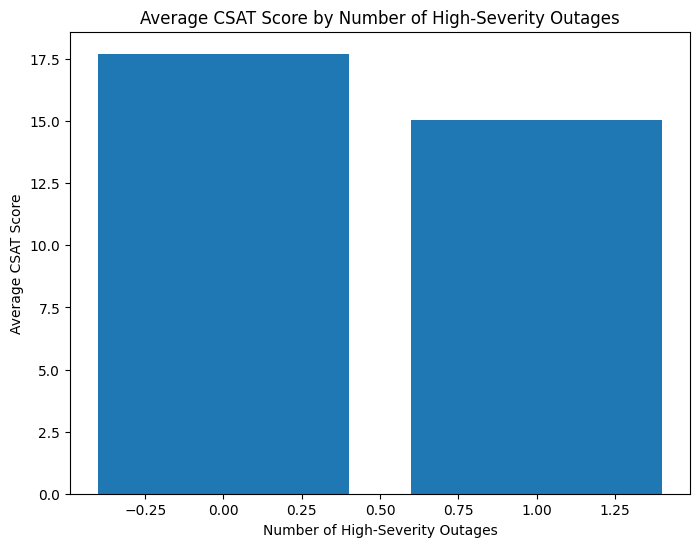

T-test for CSAT scores and high-severity outages:
T-statistic: -2.104367046576641
P-value: 0.035365037036159896


In [ ]:
#Customers who have experienced high-severity outages are more likely to have lower CSAT scores.
merged_df = pd.read_csv('merged_data.csv')

outage_groups = merged_df.groupby('num_high_sev_outages')['csat_score'].mean()


plt.figure(figsize=(8, 6))
plt.bar(outage_groups.index, outage_groups.values)
plt.xlabel('Number of High-Severity Outages')
plt.ylabel('Average CSAT Score')
plt.title('Average CSAT Score by Number of High-Severity Outages')
plt.show()

from scipy.stats import ttest_ind

group1 = merged_df[merged_df['num_high_sev_outages'] == 1]['csat_score']
group2 = merged_df[merged_df['num_high_sev_outages'] == 0]['csat_score']

t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-test for CSAT scores and high-severity outages:\nT-statistic: {t_statistic}\nP-value: {p_value}")


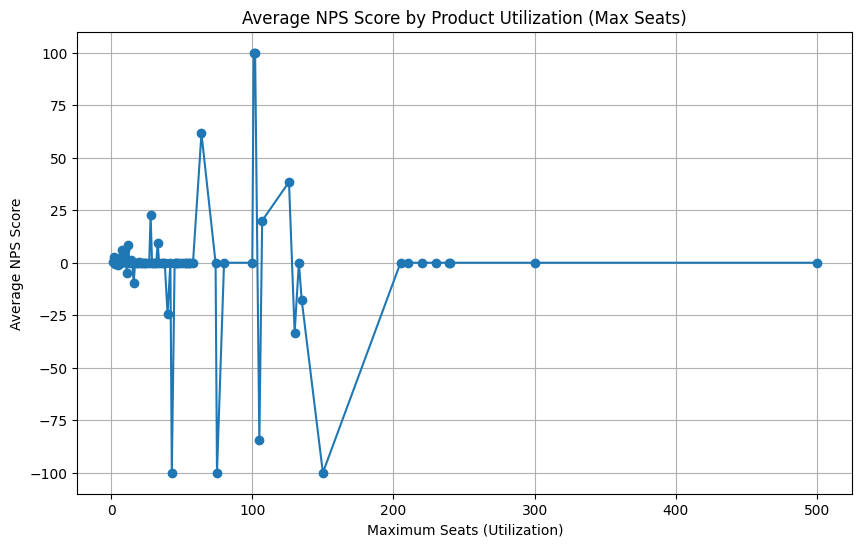

Correlation between Max Seats (Utilization) and NPS Score: -0.02834100172455762


In [ ]:
# Customers with higher product utilization have a higher average NPS score.


avg_nps_by_utilization = merged_df.groupby('max_seats')['nps_score'].mean()


plt.figure(figsize=(10, 6))
plt.plot(avg_nps_by_utilization.index, avg_nps_by_utilization.values, marker='o')
plt.xlabel('Maximum Seats (Utilization)')
plt.ylabel('Average NPS Score')
plt.title('Average NPS Score by Product Utilization (Max Seats)')
plt.grid(True)
plt.show()

correlation = merged_df['max_seats'].corr(merged_df['nps_score'])
print(f"Correlation between Max Seats (Utilization) and NPS Score: {correlation}")

